In [28]:
import pandas as pd 
import seaborn as sns
from seaborn import heatmap

In this assignment you will work with a beer data set. Please provide an answer to the questions below. Answer as many questions as possible:

1)Rank the top 3 breweries which produce the strongest beers.
2)Which year did beers enjoy the highest ratings?
3)Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?
4)If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?

In [2]:
df = pd.read_csv("BeerDataScienceProject.tar.bz2", compression="bz2")

In [3]:
df

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
0,5.0,47986,10325,Sausa Weizen,Hefeweizen,2.5,2.0,1.5,1.5,stcules,1.5,A lot of foam. But a lot. In the smell some ba...,1234817823
1,6.2,48213,10325,Red Moon,English Strong Ale,3.0,2.5,3.0,3.0,stcules,3.0,"Dark red color, light beige foam, average. In ...",1235915097
2,6.5,48215,10325,Black Horse Black Beer,Foreign / Export Stout,3.0,2.5,3.0,3.0,stcules,3.0,"Almost totally black. Beige foam, quite compac...",1235916604
3,5.0,47969,10325,Sausa Pils,German Pilsener,3.5,3.0,3.0,2.5,stcules,3.0,"Golden yellow color. White, compact foam, quit...",1234725145
4,7.7,64883,1075,Cauldron DIPA,American Double / Imperial IPA,4.0,4.5,4.0,4.0,johnmichaelsen,4.5,"According to the website, the style for the Ca...",1293735206
...,...,...,...,...,...,...,...,...,...,...,...,...,...
528865,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,3.5,orangemoustache,4.0,"A-pours a reddish amber that looks very nice,l...",1205212721
528866,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.5,3.0,3.0,MisterStout,3.0,I don't really have anything special to say ab...,1203490783
528867,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,4.0,4.5,4.0,meechum,4.5,Had this on tap at Vreny's Beirgarten A - Came...,1201320897
528868,NaN,4032,3340,Dinkel Acker Dark,Munich Dunkel Lager,4.0,3.0,4.0,4.0,Dodo2step,4.5,"Purchased at Market Cross Pub in carlisle, PA....",1201215290


In [4]:
df.isna().sum()

beer_ABV              20280
beer_beerId               0
beer_brewerId             0
beer_name                 0
beer_style                0
review_appearance         0
review_palette            0
review_overall            0
review_taste              0
review_profileName      115
review_aroma              0
review_text             119
review_time               0
dtype: int64

In [5]:
df.dtypes

beer_ABV              float64
beer_beerId             int64
beer_brewerId           int64
beer_name              object
beer_style             object
review_appearance     float64
review_palette        float64
review_overall        float64
review_taste          float64
review_profileName     object
review_aroma          float64
review_text            object
review_time             int64
dtype: object

In [6]:
df.shape

(528870, 13)

In [7]:
df.beer_name.unique()

array(['Sausa Weizen', 'Red Moon', 'Black Horse Black Beer', ...,
       'Dinkelacker Goldhälsle', 'Schwaben Pilsner', 'Dinkel Acker Dark'],
      dtype=object)

In [8]:
df.dropna(inplace=True)

In [9]:
df = df.sort_values(by="review_overall", ascending=False).drop_duplicates(subset=["review_profileName", "beer_beerId"],
                                                                          keep="first")

In [10]:
df

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time
492945,6.2,1339,132,Hazelnut Brown Nectar,American Brown Ale,4.5,3.0,5.0,4.5,prosper,5.0,"Served at ~15C. Gorgeous pour. Nut brown, slig...",1221003321
172728,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,5.0,3.0,5.0,4.5,AussieInPhilly,4.0,"This beer is tops. The crisp, yet smooth taste...",1129192511
409699,7.5,15881,694,Tröegs Nugget Nectar,American Amber / Red Ale,4.0,4.0,5.0,4.5,abents,4.5,Thanks to mikereaser for sending this in a tra...,1235006981
517331,5.0,571,113,Samuel Smith's Oatmeal Stout,Oatmeal Stout,4.5,4.5,5.0,4.5,cuzinpete00,4.5,this beer is a must try. very drinkable and ve...,1203476701
172704,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,3.0,3.5,5.0,4.0,lordbrad1,5.0,I've never met anyone that didn't like this be...,1135296352
...,...,...,...,...,...,...,...,...,...,...,...,...,...
412462,6.2,45558,73,Great Lakes Grassroots Ale,Saison / Farmhouse Ale,4.0,3.5,1.0,2.0,BMoney575,1.0,Sampled on 5-30-09 Best before 10-21-09 Pours ...,1243716795
188052,12.0,51067,782,Earthquake High Gravity Lager,American Malt Liquor,1.0,1.0,1.0,2.0,Avagadro,1.0,"A: can is poorly designed, but big with the ab...",1257479386
39601,4.0,3806,1413,Pub Pils,Czech Pilsener,0.0,2.0,0.0,3.0,beernut7,2.0,This is one of the most commercial tasting mic...,1030197670
39617,4.0,3804,1413,Latter Days Stout,Irish Dry Stout,0.0,4.0,0.0,2.0,beernut7,2.0,This beer presents with a heavy smoky roast ar...,1030267158


Rank the top 3 breweries which produce the strongest beers

In [11]:
df_brewer = df.groupby("beer_brewerId",as_index=False).agg({'beer_ABV':'mean'}).rename(columns={'beer_ABV':'mn_score'})

In [12]:
df_brewer['rank'] = df_brewer['mn_score'].rank(method='dense',ascending=False).astype('int')

In [13]:
df_brewer

,beer_brewerId,mn_score,rank
0,1,4.439773,986
1,3,5.537351,632
2,5,4.789855,902
3,10,4.973214,849
4,14,6.957675,235
...,...,...,...
1602,27870,6.000000,474
1603,27879,5.500000,648
1604,27917,8.000000,84
1605,27922,7.450000,148


In [14]:
df_brewer[df_brewer['rank']<4]

,beer_brewerId,mn_score,rank
165,736,13.750000,2
699,6513,19.228824,1
1466,24215,12.466667,3


<AxesSubplot:>

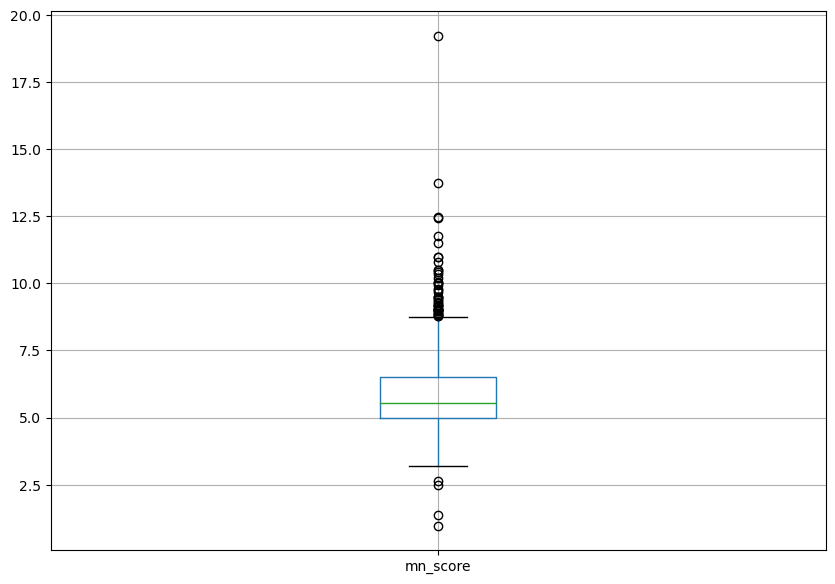

In [21]:
df_brewer.boxplot(column="mn_score", figsize=(10, 7))

Which year did beers enjoy the highest ratings?

In [61]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
492945,6.2,1339,132,Hazelnut Brown Nectar,American Brown Ale,4.5,3.0,5.0,4.5,prosper,5.0,"Served at ~15C. Gorgeous pour. Nut brown, slig...",1221003321,2008
172728,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,5.0,3.0,5.0,4.5,AussieInPhilly,4.0,"This beer is tops. The crisp, yet smooth taste...",1129192511,2005
409699,7.5,15881,694,Tröegs Nugget Nectar,American Amber / Red Ale,4.0,4.0,5.0,4.5,abents,4.5,Thanks to mikereaser for sending this in a tra...,1235006981,2009
517331,5.0,571,113,Samuel Smith's Oatmeal Stout,Oatmeal Stout,4.5,4.5,5.0,4.5,cuzinpete00,4.5,this beer is a must try. very drinkable and ve...,1203476701,2008
172704,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,3.0,3.5,5.0,4.0,lordbrad1,5.0,I've never met anyone that didn't like this be...,1135296352,2005


In [16]:
df["review_year"] = pd.to_datetime(df["review_time"], unit="s").dt.year

In [18]:
df.groupby('review_year', as_index=False)\
.agg({'review_overall':'mean','review_profileName':'count'})\
.rename(columns={'review_overall':'mn'})\
.sort_values(by='mn', ascending=False)

,review_year,mn,review_profileName
2,2000,4.241379,29
0,1998,4.045455,11
1,1999,4.000000,10
3,2001,3.963687,537
12,2010,3.869730,90504
11,2009,3.868657,80457
7,2005,3.845787,27501
10,2008,3.840451,65920
14,2012,3.839105,3061
13,2011,3.833515,107163


В 2000 слишком мало наблюдений поэтому все-так в 2010 было самое лучшее пиво 

Based on the users' ratings, which factors are important among taste, aroma, appearance, and palette?

In [25]:
df1 = df_q3 = df.groupby(by="beer_beerId")[["review_taste","review_aroma","review_appearance","review_palette","review_overall"
]].mean()

In [26]:
df1.corr()

,review_taste,review_aroma,review_appearance,review_palette,review_overall
review_taste,1.000000,0.835019,0.682233,0.756267,0.823202
review_aroma,0.835019,1.000000,0.660202,0.825980,0.883828
review_appearance,0.682233,0.660202,1.000000,0.669179,0.637700
review_palette,0.756267,0.825980,0.669179,1.000000,0.766877
review_overall,0.823202,0.883828,0.637700,0.766877,1.000000


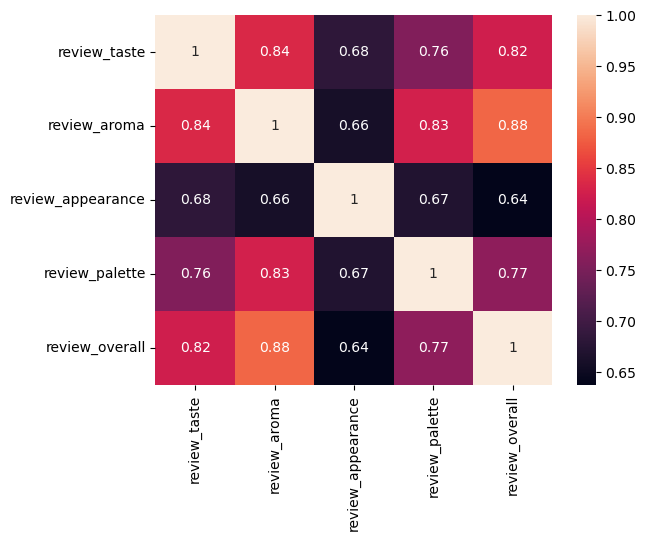

In [29]:
ht = heatmap(data=df1.corr(), annot=True)

If you were to recommend 3 beers to your friends based on this data, which ones would you recommend?

In [60]:
df.head()

,beer_ABV,beer_beerId,beer_brewerId,beer_name,beer_style,review_appearance,review_palette,review_overall,review_taste,review_profileName,review_aroma,review_text,review_time,review_year
492945,6.2,1339,132,Hazelnut Brown Nectar,American Brown Ale,4.5,3.0,5.0,4.5,prosper,5.0,"Served at ~15C. Gorgeous pour. Nut brown, slig...",1221003321,2008
172728,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,5.0,3.0,5.0,4.5,AussieInPhilly,4.0,"This beer is tops. The crisp, yet smooth taste...",1129192511,2005
409699,7.5,15881,694,Tröegs Nugget Nectar,American Amber / Red Ale,4.0,4.0,5.0,4.5,abents,4.5,Thanks to mikereaser for sending this in a tra...,1235006981,2009
517331,5.0,571,113,Samuel Smith's Oatmeal Stout,Oatmeal Stout,4.5,4.5,5.0,4.5,cuzinpete00,4.5,this beer is a must try. very drinkable and ve...,1203476701,2008
172704,4.7,689,221,Red Stripe Jamaican Lager,American Adjunct Lager,3.0,3.5,5.0,4.0,lordbrad1,5.0,I've never met anyone that didn't like this be...,1135296352,2005


In [40]:
rec_beer = df.groupby('beer_beerId', as_index=False)\
.agg({'review_overall':'mean','review_profileName':'count'})\
.rename(columns={'review_profileName':'cnt'})

In [ ]:
На основе этого дата фрейма я бы сделал рекомандацию на основе средних отзывов с количеством ревьюеров больше 1000

In [55]:
rec_beer[rec_beer['cnt']>1000].sort_values(by='review_overall', ascending=False).head(3)

,beer_beerId,review_overall,cnt
3561,19960,4.402029,1873
2828,15881,4.394835,1878
2086,11757,4.359394,2443


In [59]:
df[(df["beer_beerId"] == 19960) | (df["beer_beerId"] == 15881) | (df["beer_beerId"] == 11757)].drop_duplicates(
    subset="beer_beerId")['beer_name'].tolist()

['Tröegs Nugget Nectar',
 'Founders Breakfast Stout',
 'Founders KBS (Kentucky Breakfast Stout)']